In [369]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop, Adam
import tensorflow as tf


In [256]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [257]:
data = pd.read_csv(r'C:\Users\Hp\Desktop\dataset\DL\IMDB Dataset.csv')

In [258]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [259]:
# View the 5 rows of the dataset :
for i in range(5):
    print("Review: ", [i])
    print(data['review'].iloc[i], "\n")
    print("Sentiment: ", data['sentiment'].iloc[i], "\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

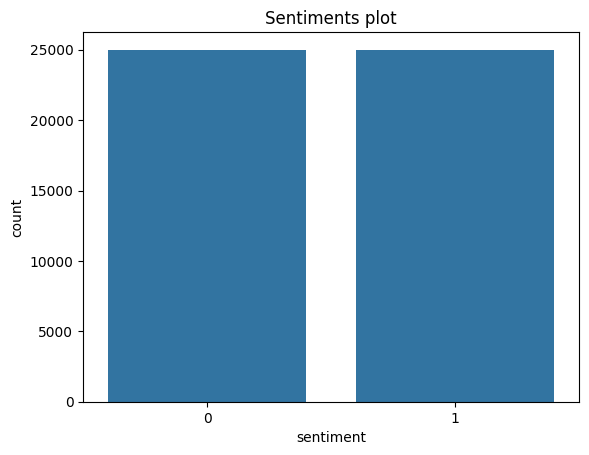

In [340]:
# Check for sentiment distribution :
sns.countplot(x='sentiment', data=data)
plt.title('Sentiments plot')
plt.show()

In [261]:
# Create a function to clean the text data and count the number of words in the text :
def number_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [262]:
# apply the function to the review column :
data['word_count'] = data['review'].apply(number_of_words)

In [263]:
data

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230
...,...,...,...
49995,I thought this movie did a down right good job...,positive,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112
49997,I am a Catholic taught in parochial elementary...,negative,230
49998,I'm going to have to disagree with the previou...,negative,212


In [264]:
# replace the sentiment column with 1 for positive and 0 for negative :
data.sentiment.replace("positive", 1, inplace=True)
data.sentiment.replace("negative", 0, inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_14372\3281743340.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.sentiment.replace("positive", 1, inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_14372\3281743340.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [265]:
df = data.copy()

Tokenize the text and remove stop words :

In [266]:
# function to clean the text data :
def processing(text):
    text = text.lower()
    text = re.sub('<br />', '', text) 
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]','', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stopwords.words('english')]
    return " ".join(filtered_text)

In [267]:
# apply the function to the review column :
df.review = df['review'].apply(processing)

In [ ]:
# number of duplicate entries :
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  421


In [269]:
df = df.drop_duplicates('review')

In [270]:
# stemming for root word function :
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [271]:
df.review = df['review'].apply(lambda x: stemming(x))

In [272]:
df['word count'] = df['review'].apply(number_of_words)
df.head()

,review,sentiment,word_count,word count
0,one reviewers mentioned watching 1 oz episode ...,1,307,168
1,wonderful little production filming technique ...,1,162,84
2,thought wonderful way spend time hot summer we...,1,166,86
3,basically theres family little boy jake thinks...,0,138,67
4,petter matteis love time money visually stunni...,1,230,125


In [274]:
df.drop(columns='word_count', axis=1, inplace=True)
df

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125
...,...,...,...
49995,thought movie right good job wasnt creative or...,1,85
49996,bad plot bad dialogue bad acting idiotic direc...,0,55
49997,catholic taught parochial elementary schools n...,0,115
49998,im going disagree previous comment side maltin...,0,115


In [275]:
positive_reviews = df[df.sentiment ==1]
positive_reviews.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


In [277]:
# Count of each word in the dataset : positive reviews
count = Counter()
for text in positive_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [278]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,film,39285
1,movie,35830
2,one,25621
3,like,16998
4,good,14281


In [ ]:
# plot the common words in positive reviews :
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color='word')

In [282]:
negative_reviews = df[df.sentiment ==0]
negative_reviews.head()

,review,sentiment,word count
3,basically theres family little boy jake thinks...,0,67
7,show amazing fresh innovative idea 70s first a...,0,83
8,encouraged positive comments film looking forw...,0,64
10,phil alien one quirky films humour based aroun...,0,51
11,saw movie 12 came recall scariest scene big bi...,0,84


In [283]:
# count of each word in the dataset : negative reviews
count = Counter()
for text in negative_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [284]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movie,47001
1,film,34651
2,one,24361
3,like,21508
4,even,14759


In [285]:
# plot the common words in negative reviews :
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color='word')

In [341]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(encoding='utf-8', 
                                   ngram_range=(1,2), 
                                   max_df=0.5, 
                                   min_df=2, 
                                   max_features=1000, 
                                   norm='l2', 
                                   sublinear_tf=True,
                                   strip_accents='unicode')

In [342]:
X = df['review']
Y = df['sentiment']

In [343]:
X = tfidf_vectorizer.fit_transform(X)

In [ ]:
# tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# Display the DataFrame
# print(tfidf_df.head())
#  MemoryError: Unable to allocate 81.9 GiB for an array with shape (49578, 221707) and data type float64

In [344]:
X1 = df['review'][:2000]
Y1 = df['sentiment'][:2000]

In [345]:
X1 = tfidf_vectorizer.fit_transform(X1)

In [346]:
tfidf_df = pd.DataFrame(X1.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# Display the DataFrame
print(tfidf_df.head())

         10   15   20  80s  able  absolutely  accent  across  act  acted  ...  \
0  0.000000  0.0  0.0  0.0   0.0         0.0     0.0     0.0  0.0    0.0  ...   
1  0.000000  0.0  0.0  0.0   0.0         0.0     0.0     0.0  0.0    0.0  ...   
2  0.000000  0.0  0.0  0.0   0.0         0.0     0.0     0.0  0.0    0.0  ...   
3  0.139855  0.0  0.0  0.0   0.0         0.0     0.0     0.0  0.0    0.0  ...   
4  0.000000  0.0  0.0  0.0   0.0         0.0     0.0     0.0  0.0    0.0  ...   

   years ago  yes  yet      york  youd     youll     young     youre  youve  \
0        0.0  0.0  0.0  0.000000   0.0  0.114805  0.000000  0.000000    0.0   
1        0.0  0.0  0.0  0.000000   0.0  0.000000  0.000000  0.000000    0.0   
2        0.0  0.0  0.0  0.000000   0.0  0.000000  0.141262  0.000000    0.0   
3        0.0  0.0  0.0  0.000000   0.0  0.000000  0.000000  0.148822    0.0   
4        0.0  0.0  0.0  0.151106   0.0  0.000000  0.000000  0.000000    0.0   

     zombie  
0  0.000000  
1  0.00000

In [347]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((39662, 1000), (39662,), (9916, 1000), (9916,))

In [ ]:
# x_train = x_train.toarray()
# x_test = x_test.toarray()
# MemoryError: Unable to allocate 65.5 GiB for an array with shape (39662, 221707) and data type float64

In [367]:
model = Sequential()
input_shape = x_train.shape[1]
model.add(Dense(units=16, activation='relu', input_dim=input_shape))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

c:\Users\Hp\Desktop\dataset\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [349]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [350]:
history = model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8100 - loss: 0.4366
Epoch 2/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8683 - loss: 0.3078
Epoch 3/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8678 - loss: 0.3072
Epoch 4/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8683 - loss: 0.3019
Epoch 5/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8719 - loss: 0.2978
Epoch 6/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8706 - loss: 0.3021
Epoch 7/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8687 - loss: 0.3030
Epoch 8/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8736 - loss: 0.2957
Epoch 9/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8731 - loss: 0.3023
Epoch 10/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8767 - loss: 0.2946
Epoch 11/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8801 - loss: 0.2899
Epoch 12/15
3967/3967 ━━━━━━━━

In [353]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │        16,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,324 (126.27 KB)

 Trainable params: 16,161 (63.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,163 (63.14 KB)

In [354]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8518 - loss: 0.3509
Test loss: 0.34116801619529724
Test accuracy: 0.85467928647995


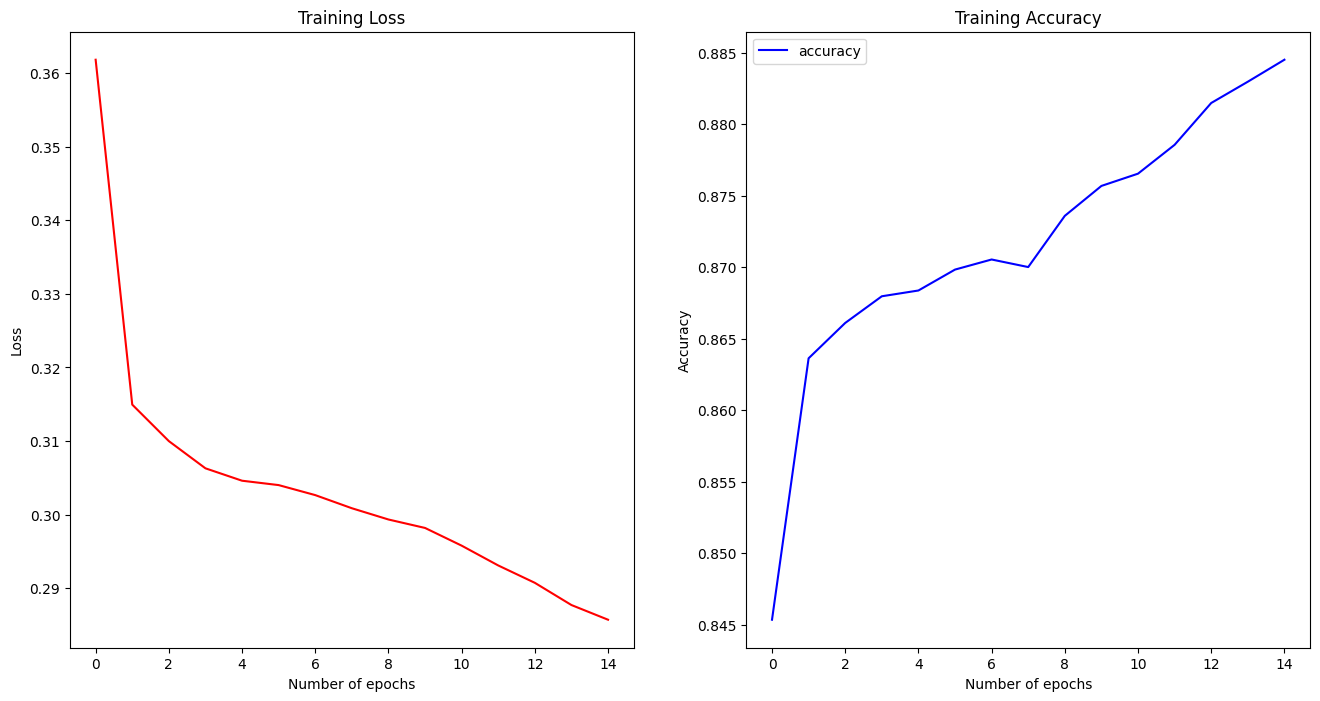

In [355]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [356]:
model_1 = Sequential()
model_1.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model_1.add(Dense(units=8, activation='relu'))
model_1.add(Dense(units=1, activation='sigmoid'))

use adam algorithm 

In [357]:
model_1.compile(optimizer='adam',
                loss='binary_crossentropy', 
                metrics=['accuracy'])

In [358]:
history = model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8881 - loss: 0.2816
Epoch 2/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8881 - loss: 0.2786
Epoch 3/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8929 - loss: 0.2725
Epoch 4/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8920 - loss: 0.2726
Epoch 5/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8962 - loss: 0.2681
Epoch 6/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8980 - loss: 0.2622
Epoch 7/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8983 - loss: 0.2651
Epoch 8/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8981 - loss: 0.2631
Epoch 9/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9002 - loss: 0.2589
Epoch 10/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9040 - loss: 0.2498
Epoch 11/15
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9010 - loss: 0.2603
Epoch 12/15
3967/3967 ━━━━━━━━

In [359]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │        16,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,324 (126.27 KB)

 Trainable params: 16,161 (63.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,163 (63.14 KB)

In [360]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8369 - loss: 0.4244
Test loss: 0.4247603714466095
Test accuracy: 0.837131917476654


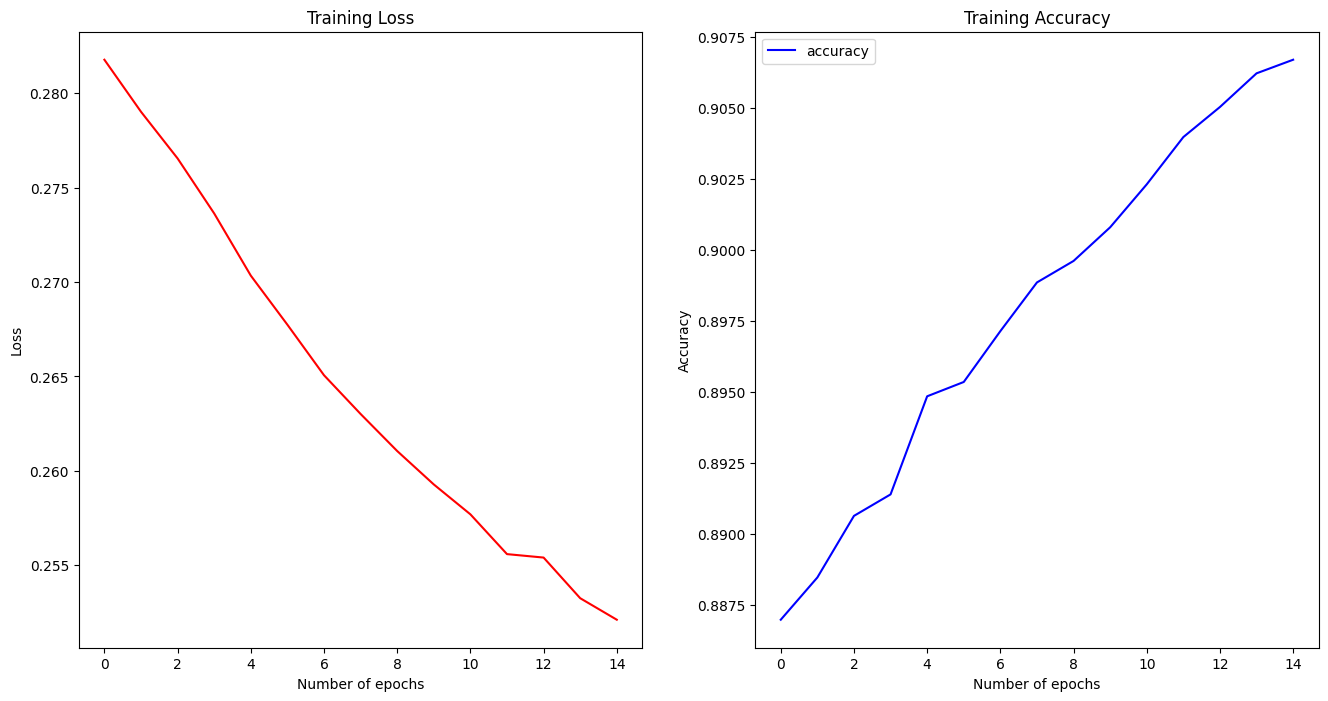

In [361]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Training Loss: The loss curve shows a steady decrease over epochs, indicating that the model is effectively minimizing the error.

Training Accuracy: The accuracy curve shows an increasing trend over epochs, suggesting that the model is correctly learning and improving its predictions.